In [1]:
import spacy
spacy.__version__

'3.4.3'

In [2]:
import pandas as pd
import numpy as np

In [3]:
data =  pd.read_json("essai1249.json",lines=True) 

In [4]:
data.head()

,nom_auteur,prenom_auteur,titre,tags,note,date,appreciations,sexe_redacteur,commentaire
0,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",5.0,20 février 2020,5,Femme,Voici un livre extraordinaire sur l'absurdité ...
1,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,22 mars 2021,6,Femme,Kumaresan et Saroja sont amoureux fous. Malheu...
2,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,23 mai 2020,7,Femme,"Pour subvenir à ses besoins, Kumaresan quitte ..."
3,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,01 février 2020,9,Femme,"Malheureusement, les castes sont toujours d'ac..."
4,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,28 janvier 2020,17,Femme,"En ouvrant le bûcher, je suis totalement sorti..."


In [5]:
import fr_core_news_sm
nlp = fr_core_news_sm.load()

In [6]:
df = data

In [7]:
df["clean_commentaire"] = df['commentaire'].str.replace(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", " ")




/tmp/ipykernel_309/486078791.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["clean_commentaire"] = df['commentaire'].str.replace(r"[!\"#$%&()*+,-./:;<=>?@[\\\]^_`{|}~]+", " ")


In [8]:
df['clean_commentaire'] = df['clean_commentaire'].fillna('').apply(lambda x: x.lower())

In [9]:
def remplacement_n(texte):
    return texte.replace("\n"," ")
df["clean_commentaire"] = df["clean_commentaire"].apply(remplacement_n)

In [10]:
def remplacement_t(texte):
    return texte.replace("\t","")
df["clean_commentaire"] = df["clean_commentaire"].apply(remplacement_t)

In [11]:
def remplacement_xa0(texte):
    return texte.replace("\xa0","")


df["clean_commentaire"] = df["clean_commentaire"].apply(remplacement_xa0)

In [12]:
df.head()

,nom_auteur,prenom_auteur,titre,tags,note,date,appreciations,sexe_redacteur,commentaire,clean_commentaire
0,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",5.0,20 février 2020,5,Femme,Voici un livre extraordinaire sur l'absurdité ...,voici un livre extraordinaire sur l'absurdité ...
1,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,22 mars 2021,6,Femme,Kumaresan et Saroja sont amoureux fous. Malheu...,kumaresan et saroja sont amoureux fous malheu...
2,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,23 mai 2020,7,Femme,"Pour subvenir à ses besoins, Kumaresan quitte ...",pour subvenir à ses besoins kumaresan quitte ...
3,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,01 février 2020,9,Femme,"Malheureusement, les castes sont toujours d'ac...",malheureusement les castes sont toujours d'ac...
4,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,28 janvier 2020,17,Femme,"En ouvrant le bûcher, je suis totalement sorti...",en ouvrant le bûcher je suis totalement sorti...


In [13]:
df["nom_auteur"].value_counts()

Michel     356
Perumal     20
Name: nom_auteur, dtype: int64

In [14]:
mask_auteur = df['nom_auteur'] == "Michel"

data_michel = df.loc[mask_auteur,:]


In [15]:
data_michel

,nom_auteur,prenom_auteur,titre,tags,note,date,appreciations,sexe_redacteur,commentaire,clean_commentaire
20,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",5.0,06 janvier 2019,146,Femme,"A la veille de la rentrée de janvier, quoi de ...",a la veille de la rentrée de janvier quoi de ...
21,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",2.0,06 janvier 2019,172,Femme,I.\nOn est dimanche. La fête de l'Épiphanie : ...,i on est dimanche la fête de l'épiphanie lo...
22,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",5.0,14 février 2019,187,Homme,Les effets secondaires du bonheur\nDans une Fr...,les effets secondaires du bonheur dans une fra...
23,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",5.0,06 janvier 2019,341,Femme,Bienvenue en Houellebecquie ! \nDès les premiè...,bienvenue en houellebecquie dès les premièr...
24,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",5.0,06 janvier 2019,63,Femme,"Je retrouve le Houellebecq que j'aime, celui d...",je retrouve le houellebecq que j'aime celui d...
...,...,...,...,...,...,...,...,...,...,...
371,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",,02 février 2019,0,Homme,Bel échange sur Fr Culture ce 2 fév 2019 \naut...,bel échange sur fr culture ce 2 fév 2019 auto...
372,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",5.0,07 février 2019,0,Inconnu,"Du pesant, peut-être trop, mais une part de vé...",du pesant peut être trop mais une part de vé...
373,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",3.0,23 février 2019,0,Inconnu,"Sérotonine, ou le récit de Florent-Claude, nar...",sérotonine ou le récit de florent claude nar...
374,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",3.0,26 février 2019,0,Femme,"Dans la lignée, comme d'habitude j'ai envie de...",dans la lignée comme d'habitude j'ai envie de...


In [16]:
mask_auteur = df['nom_auteur'] == "Perumal"

data_Perumal = df.loc[mask_auteur,:]

In [17]:
data_Perumal.head()

,nom_auteur,prenom_auteur,titre,tags,note,date,appreciations,sexe_redacteur,commentaire,clean_commentaire
0,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",5.0,20 février 2020,5,Femme,Voici un livre extraordinaire sur l'absurdité ...,voici un livre extraordinaire sur l'absurdité ...
1,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,22 mars 2021,6,Femme,Kumaresan et Saroja sont amoureux fous. Malheu...,kumaresan et saroja sont amoureux fous malheu...
2,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,23 mai 2020,7,Femme,"Pour subvenir à ses besoins, Kumaresan quitte ...",pour subvenir à ses besoins kumaresan quitte ...
3,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,01 février 2020,9,Femme,"Malheureusement, les castes sont toujours d'ac...",malheureusement les castes sont toujours d'ac...
4,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,28 janvier 2020,17,Femme,"En ouvrant le bûcher, je suis totalement sorti...",en ouvrant le bûcher je suis totalement sorti...


In [18]:
import fr_core_news_sm
nlp = fr_core_news_sm.load()

In [18]:
from spacy.lang.fr.stop_words import STOP_WORDS
stop_words = list(STOP_WORDS) + ["neuf", "qu", "quelqu", "murugan","Perumal","houellebecq","livre","roman","lire","michel","auteur"] 

## Tokenize the cleaned document
tokenized_doc = data_michel['clean_commentaire'].fillna('').apply(lambda x: nlp(x))

In [19]:
tokenized_doc

20     (a, la, veille, de, la, rentrée, de, janvier, ...
21     (i,  , on, est, dimanche,  , la, fête, de, l',...
22     (les, effets, secondaires, du, bonheur, dans, ...
23     (bienvenue, en, houellebecquie,    , dès, les,...
24     (je, retrouve, le, houellebecq, que, j', aime,...
                             ...                        
371    (bel, échange, sur, fr, culture, ce, 2, fév, 2...
372    (du, pesant,  , peut, être, trop,  , mais, une...
373    (sérotonine,  , ou, le, récit, de, florent, cl...
374    (dans, la, lignée,  , comme, d', habitude, j',...
375                                 (pas, son, meilleur)
Name: clean_commentaire, Length: 356, dtype: object

In [20]:
tokenized_doc = tokenized_doc.apply(lambda x: [token.lemma_ for token in x if token.text not in stop_words])
tokenized_doc

20     [veille, rentrée, janvier,  , mieux, petit, re...
21     [ , dimanche,  , fête, épiphanie,  , lointain,...
22     [effet, secondaire, bonheur, france, détruire,...
23     [bienvenue, houellebecquie,    , premier, page...
24     [retrouve, aime,  , premier, roman,  , ironie,...
                             ...                        
371    [bel, échange, fr, culture, 2, fév, 2019,  , a...
372              [peser,  , trop,  , part, vérité, pler]
373    [sérotonine,  , récit, florent, claude,  , nar...
374    [lignée,  , habitude, envier,  , écriture, pla...
375                                           [meilleur]
Name: clean_commentaire, Length: 356, dtype: object

In [21]:
data_michel["clean_token"] = [" ".join(x) for x in tokenized_doc]
data_michel.head()

/tmp/ipykernel_309/498668400.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_michel["clean_token"] = [" ".join(x) for x in tokenized_doc]


,nom_auteur,prenom_auteur,titre,tags,note,date,appreciations,sexe_redacteur,commentaire,clean_commentaire,clean_token
20,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",5.0,06 janvier 2019,146,Femme,"A la veille de la rentrée de janvier, quoi de ...",a la veille de la rentrée de janvier quoi de ...,veille rentrée janvier mieux petit remplir j...
21,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",2.0,06 janvier 2019,172,Femme,I.\nOn est dimanche. La fête de l'Épiphanie : ...,i on est dimanche la fête de l'épiphanie lo...,dimanche fête épiphanie lointain écho ju...
22,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",5.0,14 février 2019,187,Homme,Les effets secondaires du bonheur\nDans une Fr...,les effets secondaires du bonheur dans une fra...,effet secondaire bonheur france détruire campa...
23,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",5.0,06 janvier 2019,341,Femme,Bienvenue en Houellebecquie ! \nDès les premiè...,bienvenue en houellebecquie dès les premièr...,bienvenue houellebecquie premier page ...
24,Michel,Houellebecq,Sérotonine,"roman,suicide,agriculture,amitié,introspection...",5.0,06 janvier 2019,63,Femme,"Je retrouve le Houellebecq que j'aime, celui d...",je retrouve le houellebecq que j'aime celui d...,retrouve aime premier roman ironie mordant...


In [22]:
import matplotlib.pyplot as plt
import wordcloud

In [23]:
doc = data_michel["clean_token"].tolist()

In [24]:
doc_2 = '_'.join(doc)

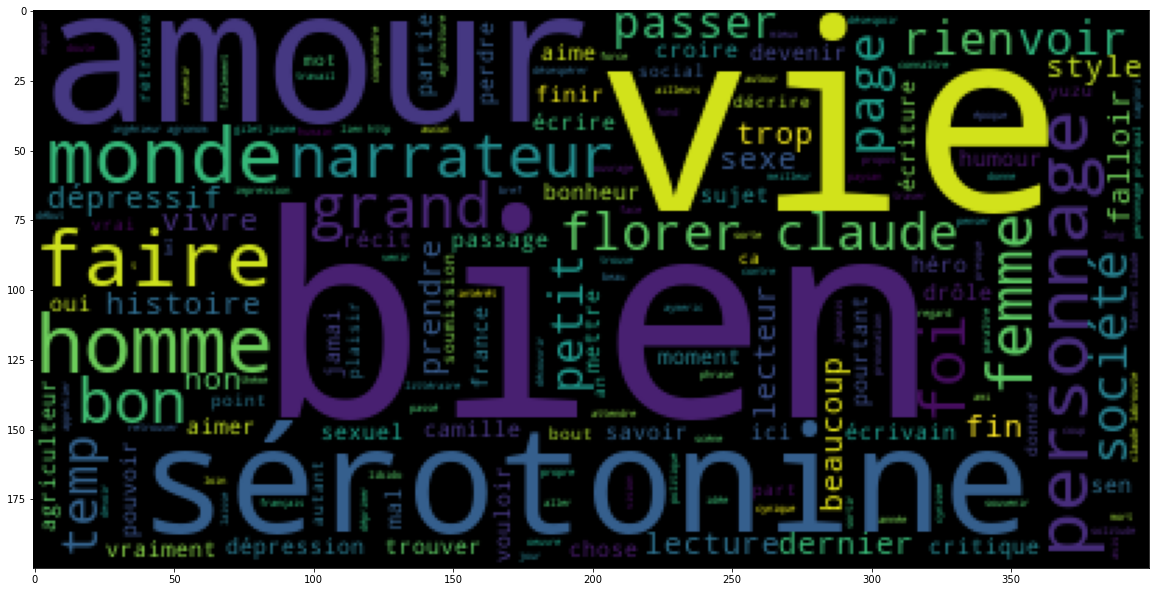

In [25]:
doc = nlp(doc_2)
wd = wordcloud.WordCloud(stopwords=stop_words)
 
cloud = wd.generate(doc.text)
plt.figure(figsize = (20, 20))
plt.imshow(cloud)

plt.show()

In [26]:
data_Perumal.head()

,nom_auteur,prenom_auteur,titre,tags,note,date,appreciations,sexe_redacteur,commentaire,clean_commentaire
0,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",5.0,20 février 2020,5,Femme,Voici un livre extraordinaire sur l'absurdité ...,voici un livre extraordinaire sur l'absurdité ...
1,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,22 mars 2021,6,Femme,Kumaresan et Saroja sont amoureux fous. Malheu...,kumaresan et saroja sont amoureux fous malheu...
2,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,23 mai 2020,7,Femme,"Pour subvenir à ses besoins, Kumaresan quitte ...",pour subvenir à ses besoins kumaresan quitte ...
3,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,01 février 2020,9,Femme,"Malheureusement, les castes sont toujours d'ac...",malheureusement les castes sont toujours d'ac...
4,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,28 janvier 2020,17,Femme,"En ouvrant le bûcher, je suis totalement sorti...",en ouvrant le bûcher je suis totalement sorti...


In [27]:
tokenized_doc_Perumal = data_Perumal['clean_commentaire'].fillna('').apply(lambda x: nlp(x))

In [28]:
tokenized_doc_Perumal = tokenized_doc_Perumal.apply(lambda x: [token.lemma_ for token in x if token.text not in stop_words])
tokenized_doc_Perumal

0     [extraordinaire, absurdité, croyance,  , lectu...
1     [kumaresan, saroja, amoureux, foutre,  , malhe...
2     [subvenir, besoin,  , kumaresan, quitte, villa...
3     [malheureusement,  , caste, actualité, inde,  ...
4     [ouvrir, bûcher,  , totalement, sortir, zone, ...
5     [dépeindre, début, grand, amour, interdire,  ,...
6     [profondément, amoureux,  , kumaresan, revenir...
7     [ , bûcher,  , magnifique, littérature, indien...
8     [particulièrement, remercier, édition, stéphan...
9     [  , kumaresan, saroja, aimer, passionnémer,  ...
10    [festival, pari, remplacer, 2022, salon, l, ',...
11    [coucou, petit, ami,   , aujourd'hui,  , retro...
12    [histoire, kumaresan, saroja, bouleverser,  , ...
13    [bûcher, perumal,  , direction, inde, coeur, a...
14    [dernier, salon, pari,  , inde, inde, devoir, ...
15    [bûcher, initialement, écrire, tamoul, traduir...
16    [commencer,  , être, désarçonner, style,   , t...
17    [perumal, offrir, histoire, amour, kumares

In [29]:
data_Perumal["clean_token"] = [" ".join(x) for x in tokenized_doc_Perumal]
data_Perumal.head()

/tmp/ipykernel_309/3229442275.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_Perumal["clean_token"] = [" ".join(x) for x in tokenized_doc_Perumal]


,nom_auteur,prenom_auteur,titre,tags,note,date,appreciations,sexe_redacteur,commentaire,clean_commentaire,clean_token
0,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",5.0,20 février 2020,5,Femme,Voici un livre extraordinaire sur l'absurdité ...,voici un livre extraordinaire sur l'absurdité ...,extraordinaire absurdité croyance lecture pr...
1,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,22 mars 2021,6,Femme,Kumaresan et Saroja sont amoureux fous. Malheu...,kumaresan et saroja sont amoureux fous malheu...,kumaresan saroja amoureux foutre malheureuse...
2,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,23 mai 2020,7,Femme,"Pour subvenir à ses besoins, Kumaresan quitte ...",pour subvenir à ses besoins kumaresan quitte ...,subvenir besoin kumaresan quitte village nat...
3,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,01 février 2020,9,Femme,"Malheureusement, les castes sont toujours d'ac...",malheureusement les castes sont toujours d'ac...,malheureusement caste actualité inde loi i...
4,Perumal,Murugan,Le bûcher,"roman,roman d'amour,sentiments,traditions,litt...",4.0,28 janvier 2020,17,Femme,"En ouvrant le bûcher, je suis totalement sorti...",en ouvrant le bûcher je suis totalement sorti...,ouvrir bûcher totalement sortir zone confort...


In [30]:
doc_Perumal = data_Perumal["clean_token"].tolist()

In [31]:
doc_Perumal_2 = '_'.join(doc_Perumal)

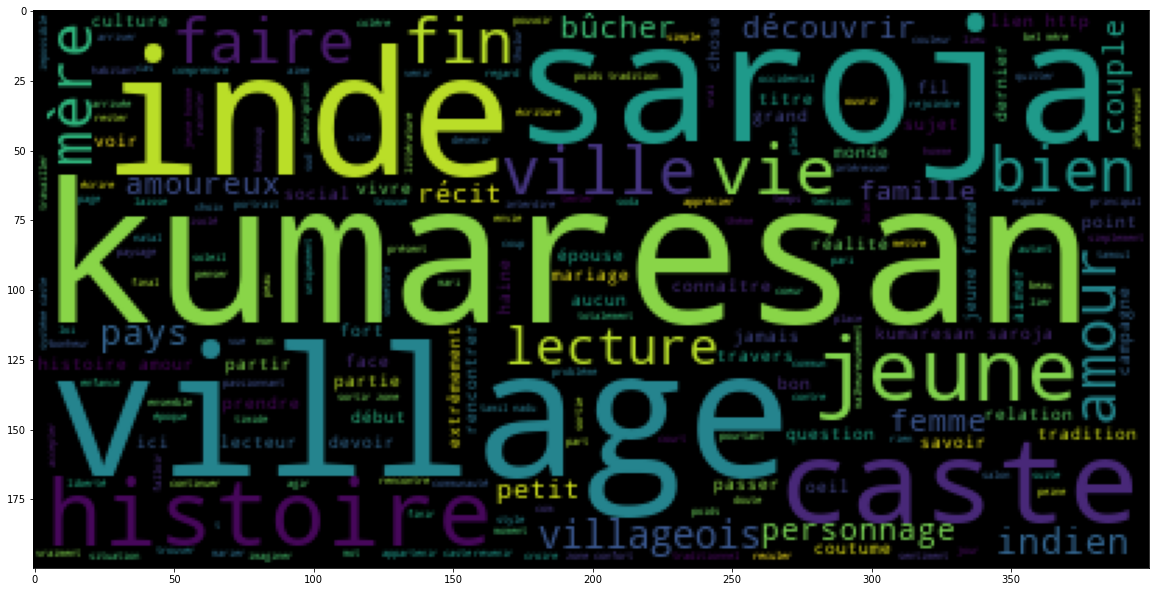

In [32]:
doc = nlp(doc_Perumal_2)
wd = wordcloud.WordCloud(stopwords=stop_words)
 
cloud = wd.generate(doc.text)

plt.figure(figsize = (20, 20))
plt.imshow(cloud)

plt.show()